In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [28]:
import os
import numpy as np 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


**“Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million
lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart
disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five
CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in
people under 70 years of age.”**
[https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1](http://)

In [29]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


- **Age**: Age of the patient
- **Sex**: Sex of the patient
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **ca**: Number of major vess]els (0-3)
- **cp**: Chest Pain type
  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg)
- **chol**: Cholesterol in mg/dl fetched via BMI sensor
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg**: Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: Maximum heart rate achieved
- **target**: 
  - 0: Less chance of heart attack
  - 1: More chance of heart attack


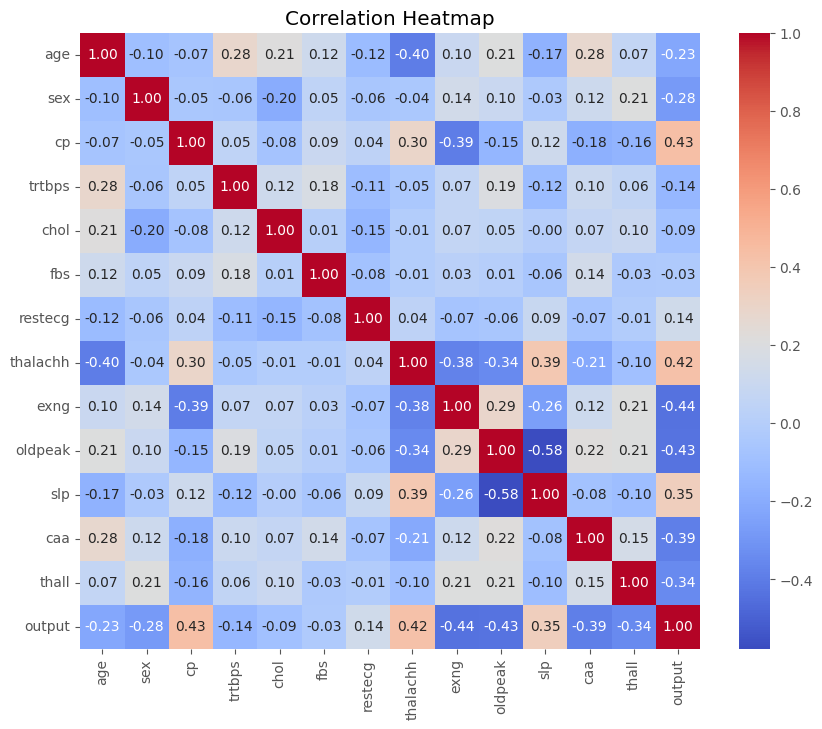

In [32]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Heatmap')
plt.show()

In [33]:
fig = px.histogram(df,x ="output", color = 'sex', hover_data = df.columns,barmode='group')
fig.show()

In [34]:
fig = px.box(df, y= "age", x = "output",title = "Age Distribution")
fig.show()

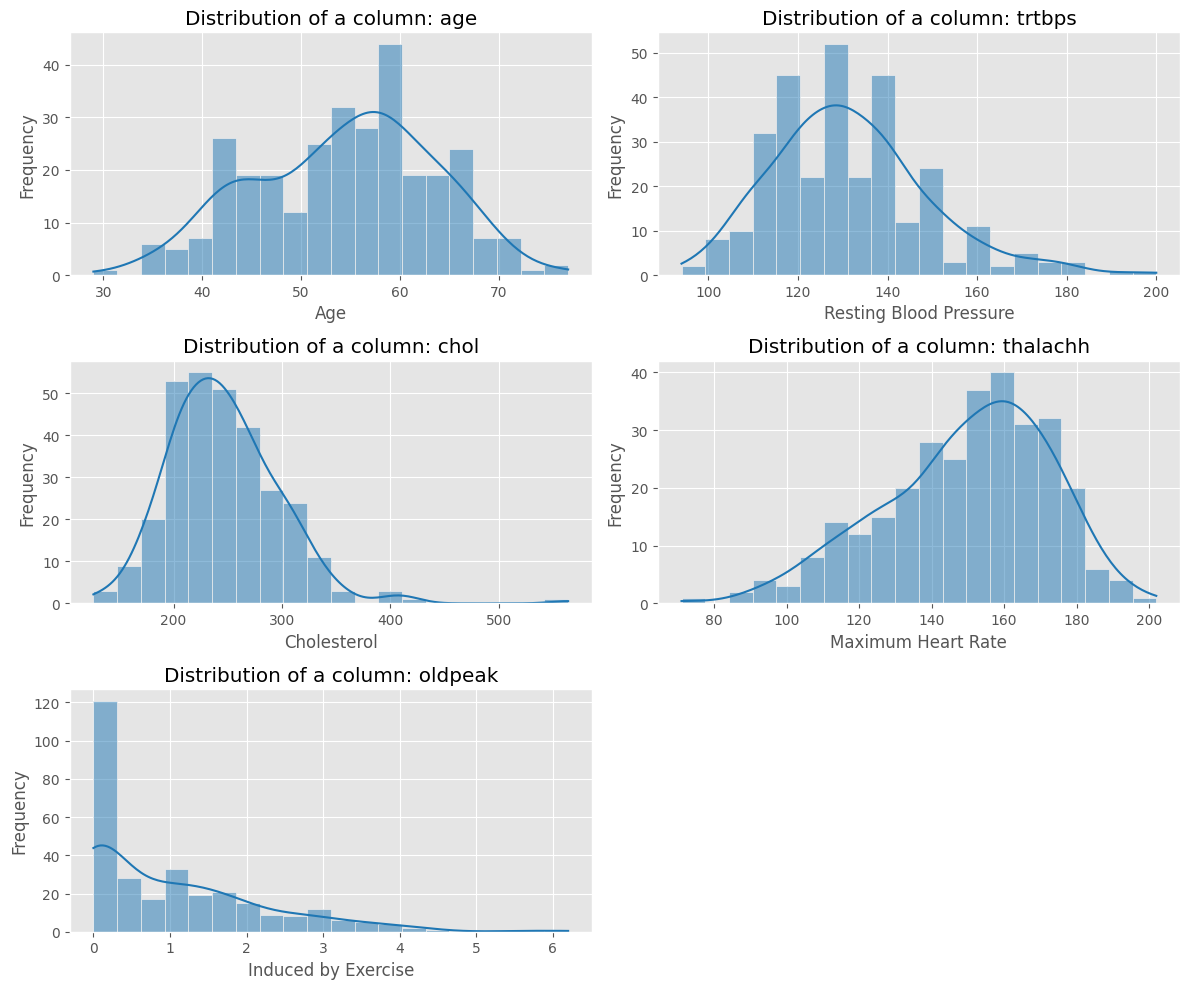

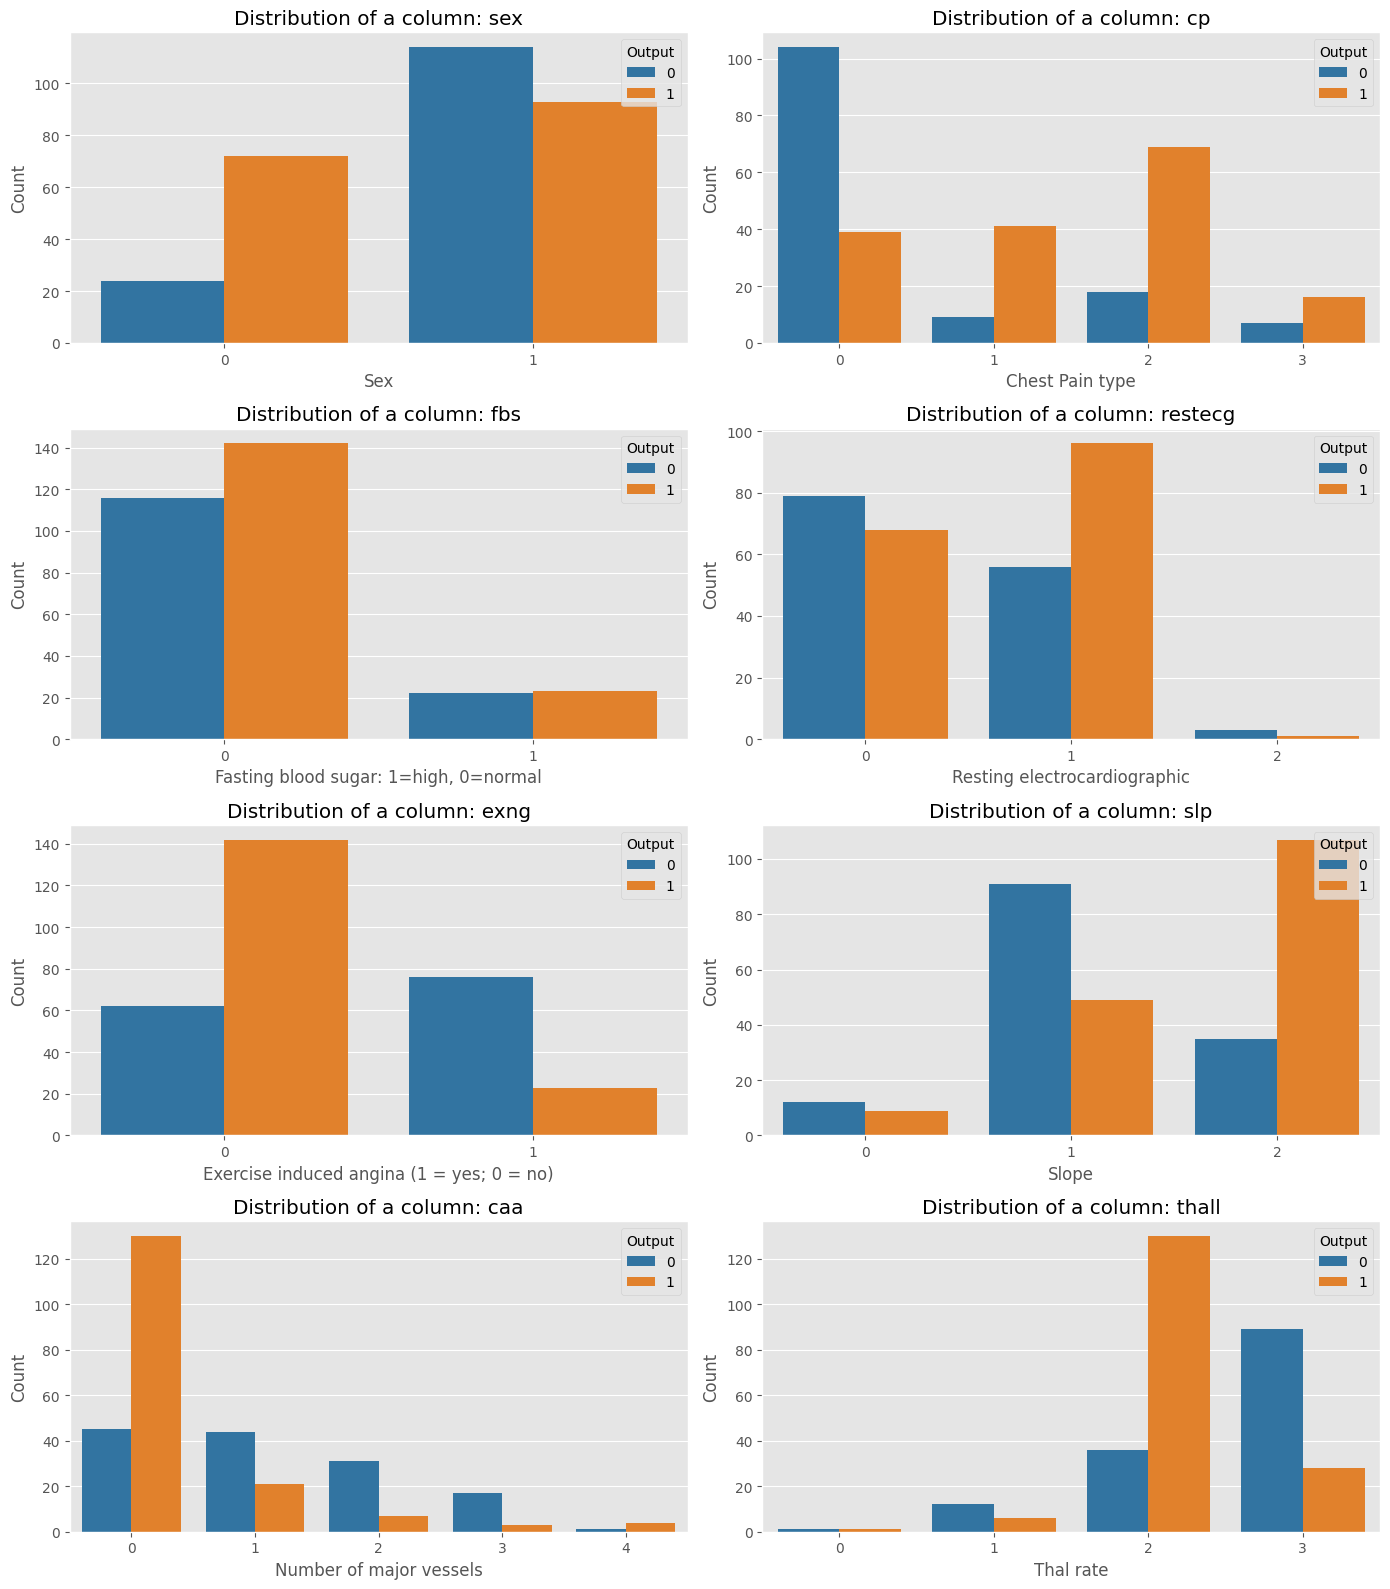

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modify colors
sns.set_palette("tab10")

num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['Age', 'Resting Blood Pressure', 'Cholesterol', 
          'Maximum Heart Rate', 'Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(num_columns, labels)):
    # Plotting distribution using seaborn's displot function
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

categ_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
labels = ['Sex', 'Chest Pain type', 'Fasting blood sugar: 1=high, 0=normal', 
          'Resting electrocardiographic', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

# Set up the plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(categ_columns, labels)):
    # Plotting distribution using seaborn's countplot function
    sns.countplot(data=df, x=column, hue='output', ax=axes[i], palette='tab10')
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label
    axes[i].legend(title='Output', loc='upper right')  # Add legend
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Adjust layout
plt.tight_layout()
plt.show()


In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [37]:
X = df.drop('output', axis = 1)
y = df['output']

In [38]:
from sklearn.preprocessing import StandardScaler

#scaled_X_train = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# K-means
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    predictor = knn.predict(X_test)
    
    error_rate.append(np.mean(predictor != y_test))

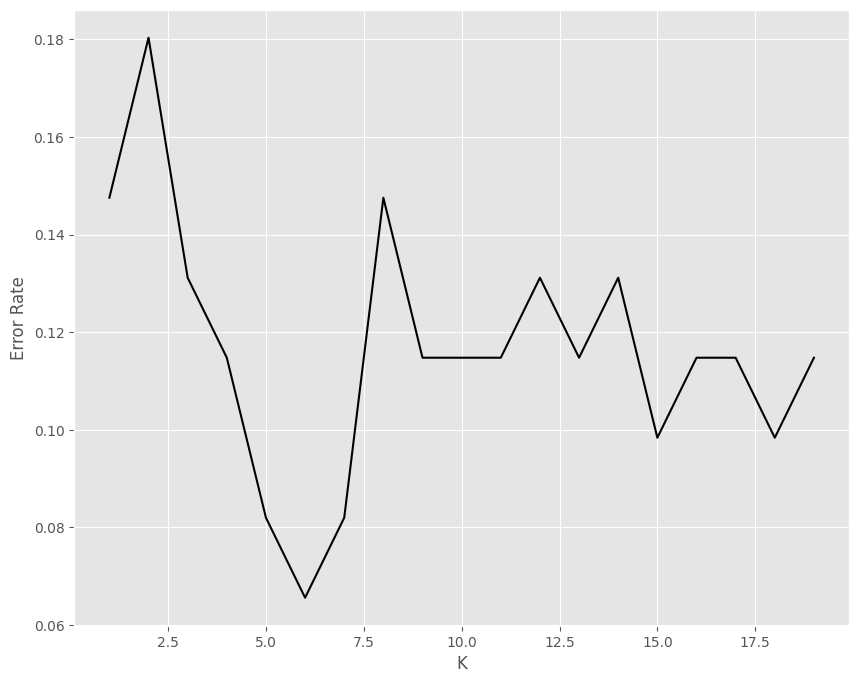

In [41]:
plt.figure(figsize= (10,8))
plt.plot(range(1,20), error_rate, color = 'black')
plt.xlabel('K')
plt.ylabel("Error Rate")
plt.show()

In [42]:
# KNN Model with K =6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

#Predict value
knn_prediction = knn.predict(X_test)

print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

[[28  1]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#Conducting SVM
svm_model=SVC()

#Hyperparameter grid for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly','sigmoid']}

grid_search=GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Displaying the best hyperparameter
best_param = grid_search.best_params_
print(f'Best hyperparameters: {best_param}')

#Training another model with the best hyperparameter
best_SVM=SVC(**best_param)
best_SVM.fit(X_train, y_train)

#Making a prediction
y_pred_SVM=best_SVM.predict(X_test) 

Best hyperparameters: {'C': 1, 'kernel': 'rbf'}


In [44]:
print(confusion_matrix(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred_SVM))

[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Performing logistic regression
logreg=LogisticRegression(solver='liblinear')

#Hyperparameter grid for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search=GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Displaying the best hyperparameter
best_C = grid_search.best_params_['C']
print(f'Best C value: {best_C}')

#Training another logistic regression model with the best hyperparameter
best_logreg=LogisticRegression(C=best_C, solver='liblinear')
best_logreg.fit(X_train, y_train)

#Making a prediction
y_pred=best_logreg.predict(X_test)

Best C value: 1


In [46]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 80, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training a Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = best_rf_classifier.predict(X_test)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [48]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [80]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter=100, random_state=42, activation = 'tanh',solver = 'adam',learning_rate_init = 0.001)
mlp_model.fit(X_train,y_train)
prediction = mlp_model.predict(X_test)

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [105]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate = .01, n_estimators = 50)
ada.fit(X_train,y_train)
prediction = ada.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[25  4]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

